# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import NeuroDAVIS as nd
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [2]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/NeuroDAVIS/'
X,y = DS.LoadData('BreastCancer')

In [3]:
X.shape

(569, 30)

In [4]:
y = y.reshape((y.shape[0],))

In [5]:
np.unique(y)

array([0, 1], dtype=int64)

# Applying NeuroDAVIS

In [6]:
data = np.eye(X.shape[0])
neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[90,45], bs=16, epoch=1000, sd=1, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/1000
36/36 [==============================] - 1s 2ms/step - loss: 55913.4922
Epoch 2/1000
36/36 [==============================] - 0s 1ms/step - loss: 55678.9102
Epoch 3/1000
36/36 [==============================] - 0s 1ms/step - loss: 54615.6602
Epoch 4/1000
36/36 [==============================] - 0s 1ms/step - loss: 51591.9844
Epoch 5/1000
36/36 [==============================] - 0s 1ms/step - loss: 45653.9219
Epoch 6/1000
36/36 [==============================] - 0s 1ms/step - loss: 36948.3750
Epoch 7/1000
36/36 [==============================] - 0s 1ms/step - loss: 26946.1016
Epoch 8/1000
36/36 [==============================] - 0s 1ms/step - loss: 18924.3574
Epoch 9/1000
36/36 [==============================] - 0s 1ms/step - loss: 15616.8633
Epoch 10/1000
36/36 [==============================] - 0s 1ms/step - loss: 14464.3340
Epoch 11/1000
36/36 [==============================] - 0s 1ms/step - loss: 13816.2900
Epoch 12/1000
36/36 [==============================] - 0s 1ms/s

36/36 [==============================] - 0s 1ms/step - loss: 91.7041
Epoch 194/1000
36/36 [==============================] - 0s 1ms/step - loss: 87.6169
Epoch 195/1000
36/36 [==============================] - 0s 1ms/step - loss: 83.9556
Epoch 196/1000
36/36 [==============================] - 0s 1ms/step - loss: 82.7123
Epoch 197/1000
36/36 [==============================] - 0s 1ms/step - loss: 80.8160
Epoch 198/1000
36/36 [==============================] - 0s 1ms/step - loss: 77.9504
Epoch 199/1000
36/36 [==============================] - 0s 1ms/step - loss: 77.1888
Epoch 200/1000
36/36 [==============================] - 0s 1ms/step - loss: 75.6812
Epoch 201/1000
36/36 [==============================] - 0s 1ms/step - loss: 74.7658
Epoch 202/1000
36/36 [==============================] - 0s 1ms/step - loss: 74.2781
Epoch 203/1000
36/36 [==============================] - 0s 1ms/step - loss: 72.3461
Epoch 204/1000
36/36 [==============================] - 0s 1ms/step - loss: 70.2044
Epoch 2

36/36 [==============================] - 0s 1ms/step - loss: 33.4808
Epoch 388/1000
36/36 [==============================] - 0s 1ms/step - loss: 32.9597
Epoch 389/1000
36/36 [==============================] - 0s 1ms/step - loss: 32.8660
Epoch 390/1000
36/36 [==============================] - 0s 1ms/step - loss: 32.2053
Epoch 391/1000
36/36 [==============================] - 0s 1ms/step - loss: 31.9018
Epoch 392/1000
36/36 [==============================] - 0s 1ms/step - loss: 32.5229
Epoch 393/1000
36/36 [==============================] - 0s 1ms/step - loss: 33.7668
Epoch 394/1000
36/36 [==============================] - 0s 1ms/step - loss: 36.6692
Epoch 395/1000
36/36 [==============================] - 0s 1ms/step - loss: 37.4696
Epoch 396/1000
36/36 [==============================] - 0s 1ms/step - loss: 37.2162
Epoch 397/1000
36/36 [==============================] - 0s 1ms/step - loss: 35.4880
Epoch 398/1000
36/36 [==============================] - 0s 1ms/step - loss: 33.9266
Epoch 3

# Plotting the results

NeuroDAVIS

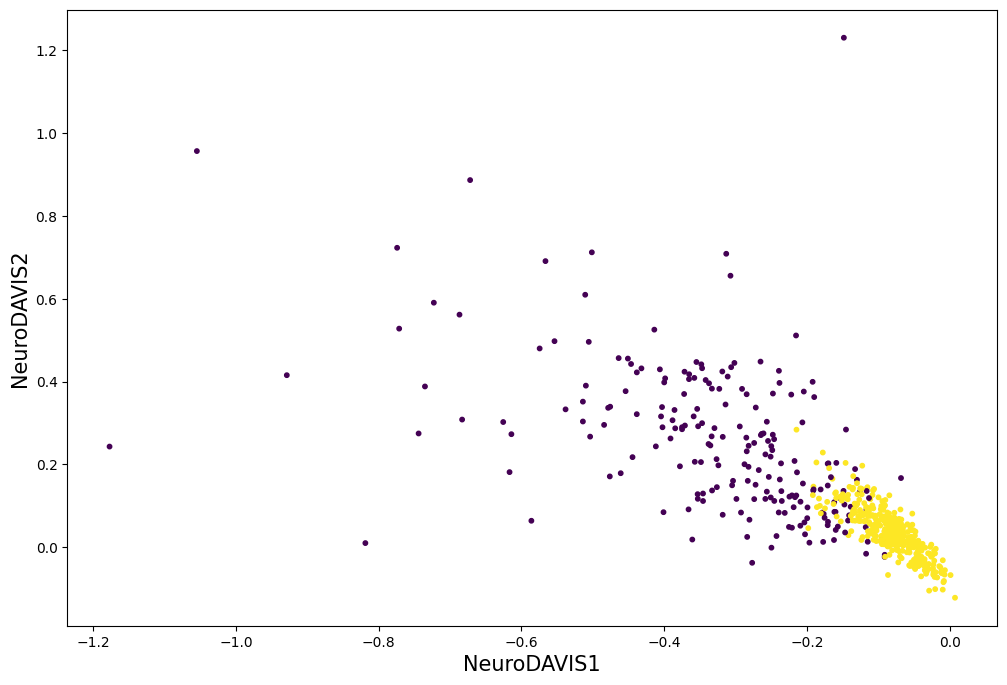

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=y,s=10)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
plt.savefig(dir+'BreastCancer_NeuroDAVIS.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [8]:
iteration = 10
score = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print('iteration {}'.format(i+1))
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[90,45], bs=16, epoch=1000, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score.append(DA.correlation(dist_orig, dist_method))

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10


In [9]:
pd.DataFrame(score)

,0
0,0.927614
1,0.977947
2,0.943453
3,0.926031
4,0.947466
5,0.932608
6,0.904008
7,0.939220
8,0.943203
9,0.945811
